In [1]:
from collections import Counter
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
# Read positive sentiments file 
file = open('sentiment_pos.txt','r')
print 'files loaded!'

files loaded!


In [3]:
# let us find year with most reviews
years = []
for lines in file:
    l = lines.strip()
    date = eval(l)['date']
    # the date is in format yyyy-mm-dd
    # extracting the year
    year = date.split('-')[0]
    years.append(year)
print Counter(years)
file.close()

Counter({u'2016': 19154, u'2015': 17898, u'2014': 14644, u'2013': 10753, u'2012': 8008, u'2011': 7494, u'2010': 5776, u'2009': 4209, u'2008': 2571, u'2017': 1170, u'2007': 919, u'2006': 196, u'2005': 10})


In [4]:
# parse file and extract date and star data
file = open('sentiment_pos.txt','r')
d = {}
for text in file:
    text = text.strip()
    date = eval(text)['date'][:-3]
    star = eval(text)['stars']
    if '2016' in date:
        date = date.split('-')[1]
        if star not in d:
            d[star] = []
            d[star].append(date)
        else:
            d[star].append(date)
print len(d)
file.close()
file1 = open('sentiment_neg.txt','r')
dn = {}
for text in file1:
    text = text.strip()
    date = eval(text)['date'][:-3]
    star = eval(text)['stars']
    if '2016' in date:
        date = date.split('-')[1]
        if star not in dn:
            dn[star] = []
            dn[star].append(date)
        else:
            dn[star].append(date)
print len(dn)
file1.close()

5
5


In [5]:
for i in d.keys():
    li = d[i]
    temp = Counter(li)
    d[i] = temp
print d
for i in dn.keys():
    li = dn[i]
    temp = Counter(li)
    dn[i] = temp
print dn

{1: Counter({u'03': 196, u'02': 194, u'07': 194, u'08': 194, u'10': 186, u'04': 180, u'05': 177, u'12': 170, u'09': 166, u'01': 165, u'06': 150, u'11': 125}), 2: Counter({u'02': 170, u'12': 163, u'06': 153, u'03': 151, u'04': 145, u'01': 144, u'05': 139, u'10': 138, u'07': 136, u'08': 119, u'11': 118, u'09': 96}), 3: Counter({u'03': 228, u'04': 214, u'01': 197, u'05': 197, u'07': 187, u'09': 187, u'12': 182, u'02': 177, u'06': 170, u'11': 170, u'08': 160, u'10': 141}), 4: Counter({u'03': 447, u'05': 428, u'04': 414, u'01': 413, u'07': 403, u'06': 401, u'02': 389, u'10': 369, u'12': 351, u'08': 338, u'09': 331, u'11': 310}), 5: Counter({u'03': 803, u'07': 775, u'01': 760, u'06': 750, u'05': 732, u'04': 722, u'09': 717, u'10': 697, u'08': 684, u'12': 664, u'02': 643, u'11': 634})}
{1: Counter({u'03': 604, u'05': 568, u'04': 541, u'08': 527, u'07': 509, u'02': 499, u'12': 491, u'09': 490, u'10': 485, u'06': 482, u'01': 444, u'11': 425}), 2: Counter({u'04': 362, u'03': 346, u'05': 337, u'0

In [6]:
import matplotlib.pyplot as plt

x1, y1, z1 = [], [], []
x2, y2, z2 = [], [], []

for star, months in d.items():
    for month, counts in enumerate(months):
        for count in counts:
            x1.append(count)
            y1.append(month)
            z1.append(star)

for star, months in dn.items():
    for month, counts in enumerate(months):
        for count in counts:
            x2.append(count)
            y2.append(month)
            z2.append(star)

trace1 = go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers'
)
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers'
)
data = [trace1,trace2]
iplot(data, filename='simple-3d-scatter')

In [7]:
# Time Series analysis on review sentiments to analyse how is the performance of a business over time
# In this example we will take business id 'OgJ0KxwJcJ9R5bUK0ixCbg' as our business model
pos_reviews = []
neg_reviews = []
file = open('sentiment_pos.txt','r')
for line in file:
    line = line.strip()
    business_id = eval(line)['business_id']
    if business_id.strip() == 'OgJ0KxwJcJ9R5bUK0ixCbg':
        date = eval(line)['date']
        # we will replace 'dd' part as '01' for simplicity
        date = date[:-3]+'-01'
        pos_reviews.append(date)
file.close()
file1 = open('sentiment_neg.txt','r')
for line in file1:
    line = line.strip()
    business_id = eval(line)['business_id']
    if business_id.strip() == 'OgJ0KxwJcJ9R5bUK0ixCbg':
        date = eval(line)['date']
        # we will replace 'dd' part as '01' for simplicity
        date = date[:-3]+'-01'
        neg_reviews.append(date)
file1.close()
print len(pos_reviews)
print len(neg_reviews)

666
867


In [8]:
print Counter(pos_reviews)
print Counter(neg_reviews)
p = Counter(pos_reviews)
n = Counter(neg_reviews)

Counter({u'2016-04-01': 22, u'2015-01-01': 17, u'2015-02-01': 17, u'2015-05-01': 16, u'2011-08-01': 16, u'2015-09-01': 15, u'2014-10-01': 15, u'2015-06-01': 13, u'2015-04-01': 12, u'2016-03-01': 12, u'2012-02-01': 12, u'2014-03-01': 12, u'2014-12-01': 12, u'2016-08-01': 12, u'2015-03-01': 12, u'2017-01-01': 11, u'2013-08-01': 11, u'2016-01-01': 10, u'2013-10-01': 10, u'2010-01-01': 10, u'2016-12-01': 10, u'2014-11-01': 10, u'2015-11-01': 9, u'2015-12-01': 9, u'2013-03-01': 9, u'2014-07-01': 9, u'2014-08-01': 9, u'2011-05-01': 9, u'2014-04-01': 8, u'2014-01-01': 8, u'2012-01-01': 8, u'2011-10-01': 8, u'2016-06-01': 8, u'2016-02-01': 8, u'2015-07-01': 7, u'2011-01-01': 7, u'2016-09-01': 7, u'2015-08-01': 7, u'2013-12-01': 7, u'2016-10-01': 7, u'2013-05-01': 7, u'2013-07-01': 7, u'2013-06-01': 6, u'2014-05-01': 6, u'2013-02-01': 6, u'2007-12-01': 6, u'2014-06-01': 6, u'2012-05-01': 6, u'2016-05-01': 6, u'2014-02-01': 6, u'2013-11-01': 6, u'2012-04-01': 6, u'2013-09-01': 5, u'2015-10-01': 

In [9]:
# Create counter object to pandas dataframe
df1 = pd.DataFrame(p.items(), columns=['Date', 'ReviewCounts'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1['ReviewCounts'] = map(lambda x:float(x), df1['ReviewCounts'])
df2 = pd.DataFrame(n.items(), columns=['Date', 'ReviewCounts'])
df2['Date'] = pd.to_datetime(df2['Date'])
df2['ReviewCounts'] = map(lambda x:float(x), df2['ReviewCounts'])

In [10]:
print df1.head()
print df1.dtypes
print df2.head()
print df2.dtypes

        Date  ReviewCounts
0 2015-05-01          16.0
1 2013-09-01           5.0
2 2008-10-01           3.0
3 2016-01-01          10.0
4 2013-10-01          10.0
Date            datetime64[ns]
ReviewCounts           float64
dtype: object
        Date  ReviewCounts
0 2015-05-01          26.0
1 2013-09-01          13.0
2 2008-10-01           2.0
3 2016-01-01          22.0
4 2013-10-01           9.0
Date            datetime64[ns]
ReviewCounts           float64
dtype: object


         Date  ReviewCounts
58 2005-07-01           1.0
45 2005-12-01           1.0
86 2006-01-01           1.0
30 2006-09-01           1.0
44 2006-10-01           2.0
         Date  ReviewCounts
85 2006-01-01           1.0
59 2006-11-01           1.0
23 2006-12-01           1.0
19 2007-07-01           2.0
28 2007-10-01           1.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



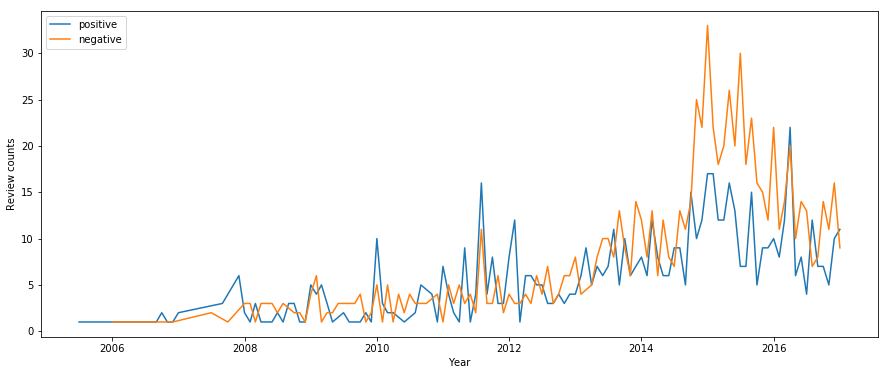

In [15]:
#ts['ReviewCounts'] = map(lambda x: float(x),ts['ReviewCounts'])
#print ts.head()
ts1 = df1.sort(['Date'])
print ts1.head()
x1 = ts1['Date']
y1 = ts1['ReviewCounts']
plt.plot(x1, y1,label = "positive")
ts2 = df2.sort(['Date'])
print ts2.head()
x2 = ts2['Date']
y2 = ts2['ReviewCounts']
plt.plot(x2, y2,label = "negative")
plt.xlabel("Year")
plt.ylabel("Review counts")
# Add legend to upper left corner of plot
plt.legend(fontsize = 'medium',loc='upper left')

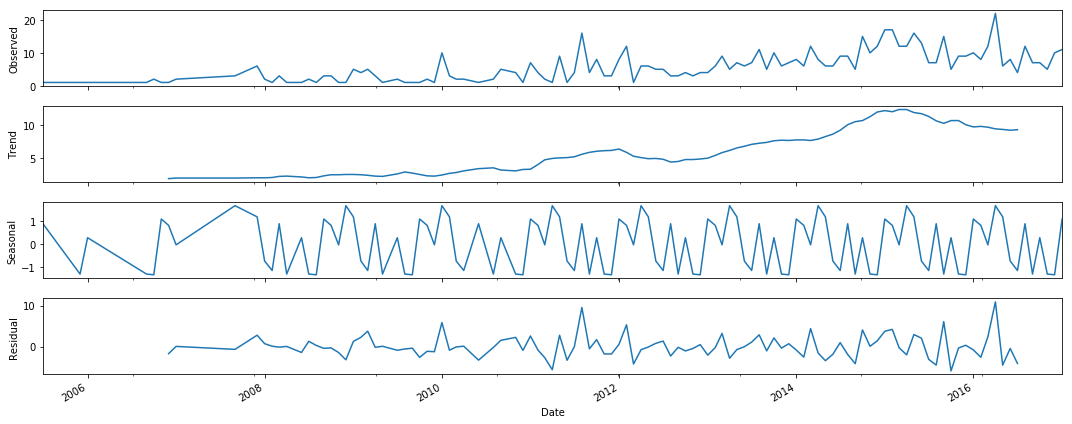

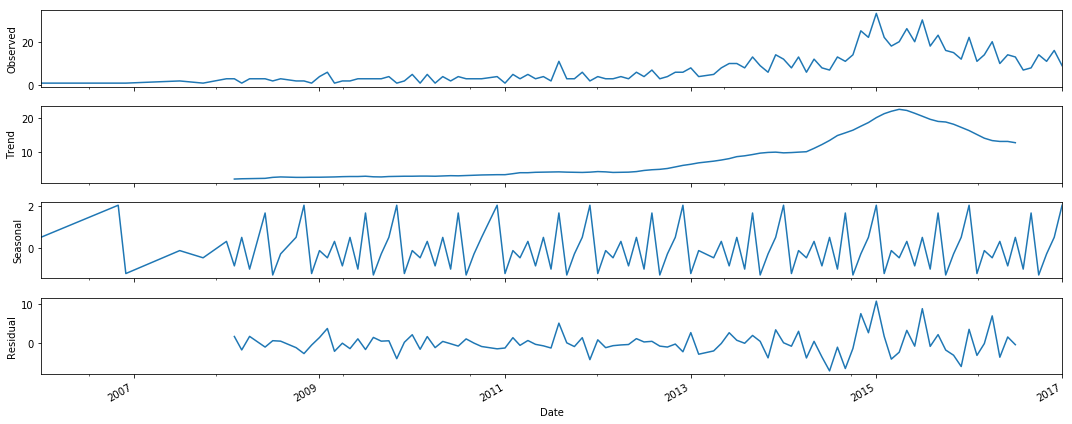

In [12]:
# extracting and plotting time series component from our data
import statsmodels.api as sm
ts1 = ts1.set_index('Date')
res1 = sm.tsa.seasonal_decompose(ts1,freq=12)
resplot1 = res1.plot()
ts2 = ts2.set_index('Date')
res2 = sm.tsa.seasonal_decompose(ts2,freq=12)
resplot2 = res2.plot()